# Using MyBacktest Library

In [1]:
import MyBacktestMk11W as mb

## Retrieving Stock Data

First, data about a stock needs to be retrieved. For this example, Procter & Gamble (PG) stock will be used: 

In [2]:
data = mb.FindData("PG").get_data()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-16 00:00:00-04:00,103.954919,104.043263,102.930127,103.831238,7973100,0.000,0.0
2019-10-17 00:00:00-04:00,104.298878,104.592278,103.623176,103.694298,5956900,0.746,0.0
2019-10-18 00:00:00-04:00,103.623195,104.690098,103.285338,104.441154,9016700,0.000,0.0
2019-10-21 00:00:00-04:00,104.396700,105.908153,104.334464,105.872589,6731600,0.000,0.0
2019-10-22 00:00:00-04:00,110.246886,110.442486,108.113073,108.628746,14410500,0.000,0.0
...,...,...,...,...,...,...,...
2024-10-10 00:00:00-04:00,168.800003,169.789993,168.369995,168.949997,6932300,0.000,0.0
2024-10-11 00:00:00-04:00,169.460007,171.410004,168.970001,171.089996,7036500,0.000,0.0
2024-10-14 00:00:00-04:00,171.020004,172.839996,170.740005,172.509995,5909000,0.000,0.0


Now the stock data for Procter & Gamble has been retrieved and stored in a Pandas DataFrame. While this data can tell us a lot about the stock, it would be helpful to add rolling averages so our model can understand the change over the past <i>n</i> number of days for each record. With the built in `DataClean()` function, rolling averages are calculated for each feature and uncessary columns are dropped (when using the `full_pipeline()` method):

In [3]:
data = mb.DataClean(data).full_pipeline()
data.head()

,Open,High,Low,Close,Volume,Target,Open_MA_5,Open_MA_10,Open_MA_30,High_MA_5,High_MA_10,High_MA_30,Low_MA_5,Low_MA_10,Low_MA_30,Close_MA_5,Close_MA_10,Close_MA_30
Date,,,,,,,,,,,,,,,,,,
2019-11-26 00:00:00-05:00,107.339587,108.779905,107.055079,108.699890,8235200,0,0.998429,0.999181,0.997120,1.004846,1.005052,1.003897,1.001697,1.001514,1.002017,1.009262,1.009837,1.010279
2019-11-27 00:00:00-05:00,108.842127,108.859913,107.544060,108.255333,3751400,0,1.010733,1.011059,1.009550,1.005486,1.004644,1.003149,1.006222,1.005177,1.005146,1.006015,1.004786,1.004770
2019-11-29 00:00:00-05:00,108.459828,109.028844,108.210885,108.522064,2927300,1,1.006834,1.006369,1.004711,1.006897,1.004999,1.003338,1.010058,1.010067,1.009935,1.005635,1.005967,1.005743
2019-12-02 00:00:00-05:00,108.415376,109.162207,107.544067,109.108864,6146200,0,1.003588,1.005169,1.002815,1.004549,1.004755,1.003189,1.001225,1.003018,1.002384,1.007041,1.009592,1.009725
2019-12-03 00:00:00-05:00,108.744316,109.322224,108.290886,109.313332,6396200,1,1.003544,1.006509,1.004511,1.002675,1.005898,1.003610,1.005216,1.008620,1.008106,1.004904,1.010603,1.010545


## Getting the Training Data

Now that the data has been transformed, the training data can be obtained by using the `get_train_data()` function. This returns features (X) and the labels (y). The `test_size` parameter defines how many of the record will be used for testing: 

In [4]:
bt = mb.Backtest(data)

X, y = bt.get_train_data(test_size=500)

An example of the features: 

In [5]:
X.head()

,Volume,Open_MA_5,Open_MA_10,Open_MA_30,High_MA_5,High_MA_10,High_MA_30,Low_MA_5,Low_MA_10,Low_MA_30,Close_MA_5,Close_MA_10,Close_MA_30
Date,,,,,,,,,,,,,
2019-11-26 00:00:00-05:00,8235200,0.998429,0.999181,0.997120,1.004846,1.005052,1.003897,1.001697,1.001514,1.002017,1.009262,1.009837,1.010279
2019-11-27 00:00:00-05:00,3751400,1.010733,1.011059,1.009550,1.005486,1.004644,1.003149,1.006222,1.005177,1.005146,1.006015,1.004786,1.004770
2019-11-29 00:00:00-05:00,2927300,1.006834,1.006369,1.004711,1.006897,1.004999,1.003338,1.010058,1.010067,1.009935,1.005635,1.005967,1.005743
2019-12-02 00:00:00-05:00,6146200,1.003588,1.005169,1.002815,1.004549,1.004755,1.003189,1.001225,1.003018,1.002384,1.007041,1.009592,1.009725
2019-12-03 00:00:00-05:00,6396200,1.003544,1.006509,1.004511,1.002675,1.005898,1.003610,1.005216,1.008620,1.008106,1.004904,1.010603,1.010545


## Training a Model

Now that the training data has been obtained, it can be used to create a classification model. Below, a grid search is performed on a decision tree classifier and the model is trained: 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_depth": [5, 10, 15, 30],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [5, 10]
}

dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
dt_clf.fit(X, y)

## Performing a Backtest

Finally, the trained model can now be used to make predictions on a day-by-day basis using the `backtest` function. This will take each day and run it through the decision tree's `predict` function. Based on what the model predicts, the function will:
* Buy stock (model predicts an increase)
* Sell stock (model predicts a decrease)
* Do nothing (model predicts little to no change)

The function's parameters used are explained below:
* `models`: what model(s) we would like to use to predict the market, along with a user defined name
* `plot_market`: plots the market trend over the time the backtest ran predictions on

The model is now ready to be backtested: 

In [8]:
back_test = bt.backtest(models={"mod1": dt_clf})

The `back_test` variable above can now be accessed to view how the model did: 

In [9]:
back_test[["Current_Shares", "Total_Invested", "Current_Equity", "Return", "Market_Increase", "Return_vs_Market"]]

,Current_Shares,Total_Invested,Current_Equity,Return,Market_Increase,Return_vs_Market
mod1,63,9576.342896,10829.699615,1.130881,1.166954,-0.036074


While the model got a return of 13%, it performed 3% worse than the stock over that same period. 

The `plot_market` parameter can to be set to true in the `backtest` function to see how the stock changed over the investing period: 

In [10]:
back_test = bt.backtest(
                        models={"mod1": dt_clf}, 
                        plot_market=True
                    ) 

The stock increased from under $150 to nearly $175. If the model had been more agressive in buying because the stock was predicted to increase in value, then it could have made a better return. 

The buying and selling behaviors can be modified by accessing the `share_multiplier` parameter of the `backtest` function. This multiplies the numbers supplied by the percent increase (buy) or decrease (sell). For instance, if "buy" is set to 10 and the model predicts a 3% increase in the market the next day, the `backtest` function will buy 30 shares (10 x 3). Similarly, if "sell" is set to 5 and the market is predicted to decrease by 4% then the model will sell 20 shares (5 x 4). If the function has inadequate money or shares, it will simply buy or sell as much as it can that day. Below, the `share_multiplier` sets "buy" to 20 and "sell" to 5: 

In [11]:
back_test = bt.backtest(
                        models={"mod1": dt_clf}, 
                        share_multiplier={"buy":20, "sell":5}
                    ) 
back_test[["Current_Shares", "Total_Invested", "Current_Equity", "Return", "Market_Increase", "Return_vs_Market"]]

,Current_Shares,Total_Invested,Current_Equity,Return,Market_Increase,Return_vs_Market
mod1,68,9692.090317,11689.199585,1.206056,1.166954,0.039101


Because the function was more aggressive in it's buying behavior and the value of the stock increased, the return is 20%, 4% more than the stock's value increase. 

The `get_log_plot` function plots the value of the stock and equity during the trading period. The `rolling` parameter allows the user to compute the rolling average of the previous <i>n</i> days. Below, each data point shows the rolling average of the previous 30 days to smooth the equity line: 

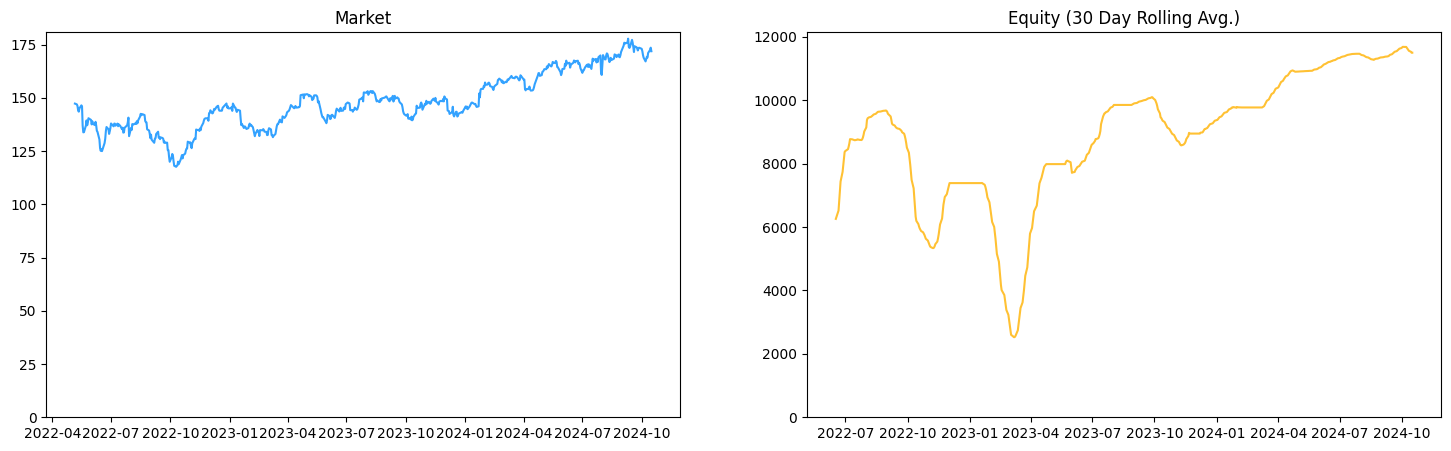

In [12]:
bt.get_equity_plot(rolling=30)

Tweaking the model parameters and using different classifiers could yield better results, but this demonstration was simply to show the `MyBacktest` function in action. While there is still much room for improvement, I feel that this model can be useful to people who want a simple way to backtest their financial ML models and see how they would perform historically. 

Thank you, 

Noah Frank 
<br>[LinkedIn](https://www.linkedin.com/in/noah-frank-032b68230/)